# Exploratory Data Analysis



Using the UMAP library to reduce the dimensions of the image embeddings from 512 and 2.  Then create a scatter plot to see if there are natural clusters around the target values.

In [17]:
from embetter.vision import ImageLoader
from embetter.multi import ClipEncoder
from embetter.grab import ColumnGrabber

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import pandas as pd
from pathlib import Path
from typing import Literal, List
import time
import os

import umap
import matplotlib.pyplot as plt


In [8]:
target_dirs = ['cow', 'elephant', 'horse', 'spider']
root_dir = str(Path(".").parent.resolve()) + "/dataset"
root_dir

'/Users/patrickryan/Development/machinelearning/scikit-learn/opencv-project1/dataset'

In [9]:

def create_filepaths_df(dir_name: Literal['Train','Valid'], dirs: List = target_dirs) -> pd.DataFrame:
    data = []
    for dir in dirs:
        for file in Path(f'{root_dir}/{dir_name}/{dir}').glob('*.jpg'):
            row_data = {
                'filepath': file,
                'target': dir
            }
            data.append(row_data)
    files_df = pd.DataFrame(data, columns=["filepath", "target"])
    return files_df


In [10]:
training_files_df = create_filepaths_df(dir_name='Train')

# create pipeline to read the filepath column, load the image, and encode the image
image_embedding_pipeline = make_pipeline(
   ColumnGrabber("filepath"),
  ImageLoader(convert="RGB"),
  ClipEncoder(),
)

# convert the filepaths to embeddings
X = image_embedding_pipeline.fit_transform(training_files_df)
y = training_files_df['target']
print(X.shape)
print(y.shape)


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


(3997, 512)
(3997,)


In [12]:
type(X)

numpy.ndarray

## Reduce the dimension of the embeddings to 2 to plot

Using UMAP to reduce the dimentionality to plot the different embeddings for each image to see if there are clusterings per label.


In [13]:
reducer = umap.UMAP(n_components=2, random_state=42)

In [14]:
reduced_embedding = reducer.fit_transform(X)

/Users/patrickryan/Development/machinelearning/scikit-learn/opencv-project1/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/patrickryan/Development/machinelearning/scikit-learn/opencv-project1/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Original shape: (3997, 512)
Reduced shape: (3997, 2)


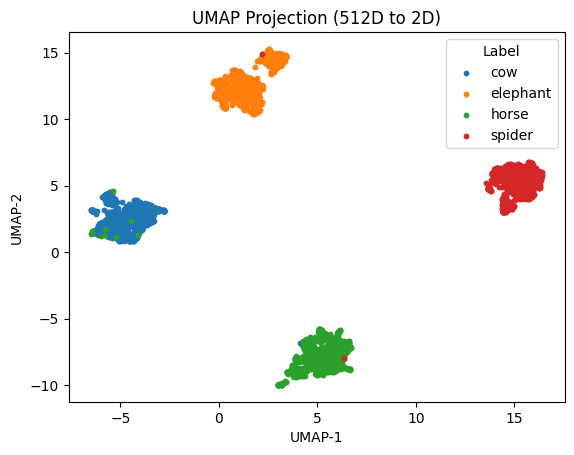

In [22]:
print("Original shape:", X.shape)
print("Reduced shape:", reduced_embedding.shape)

# Optional: visualize the result
for label in y.unique():
    idx = y == label
    plt.scatter(
        reduced_embedding[idx, 0], reduced_embedding[idx, 1],
        label=label, s=10
    )
plt.title('UMAP Projection (512D to 2D)')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend(title='Label')

plt.show()